In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras

from keras.layers import Convolution2D, Flatten, MaxPool2D
from keras.models import Sequential
from keras.utils import np_utils

In [22]:
from keras.layers import Dense, Activation, Input
from keras.models import Model

In [4]:
# Data loading

ds = pd.read_csv('/home/aayush/MLearning/datasets/mnist.csv')
ds.shape
data = ds.values[:8000]

In [5]:
data = ds.values[:8000]

In [6]:
X = data[:, 1:]/255.0
y = np_utils.to_categorical(data[:, 0])

print (X.shape, y.shape)

(8000, 784) (8000, 10)


In [7]:
split = int(0.8 * X.shape[0])

X_train = X[:split].reshape((-1, 28, 28, 1))
X_test = X[split:].reshape((-1, 28, 28, 1))

y_train = y[:split]
y_test = y[split:]

print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(6400, 28, 28, 1) (1600, 28, 28, 1)
(6400, 10) (1600, 10)


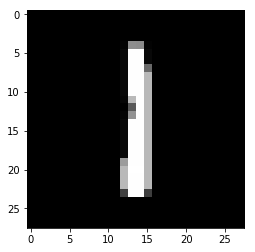

In [8]:
n_img = 2

plt.imshow(X_train[n_img].reshape((28, 28)), cmap='gray')
plt.show()

In [35]:
X_train[0].shape

(28, 28, 1)

In [36]:
inp=Input(shape=(X_train[0].shape))

c1=Convolution2D(32, (3, 3))
c2=Convolution2D(16, (3, 3))
c3=Convolution2D(8, (3, 3))

a1=Activation('sigmoid')
a2=Activation('sigmoid')
a3=Activation('sigmoid')

m1=MaxPool2D(pool_size=(2, 2))
m2=MaxPool2D(pool_size=(2, 2))

flat=Flatten()

den=Dense(10)

sof=Activation('softmax')

#out=sof(den(flat(m2(a3(c3(m1(a2(c2(a1(c1(inp))))))))))


#out=sof(den(flat(a3(c3(a2(c2(a1(c1(inp)))))))))

#o=sof(den(flat(m2(a3(c3(m1(a2(c2(a1(c1(inp)))))))))))


out=sof(den(flat(m2(a3(c3(m1(a2(c2(a1(c1(inp)))))))))))


model = Model(inputs=[inp], outputs=[out])
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_37 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
activation_38 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 10, 10, 8)         1160      
__________

In [37]:
hist = model.fit(X_train, y_train,
                epochs=10,
                shuffle=True,
                batch_size=100,
                validation_data=(X_test, y_test))

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 15s - loss: 0.0903 - acc: 0.1028 - val_loss: 0.0900 - val_acc: 0.2038
Epoch 2/10
6400/6400 [==============================] - 15s - loss: 0.0899 - acc: 0.1198 - val_loss: 0.0897 - val_acc: 0.1375
Epoch 3/10
6400/6400 [==============================] - 16s - loss: 0.0867 - acc: 0.2511 - val_loss: 0.0795 - val_acc: 0.3663
Epoch 4/10
6400/6400 [==============================] - 16s - loss: 0.0630 - acc: 0.5973 - val_loss: 0.0455 - val_acc: 0.7500
Epoch 5/10
6400/6400 [==============================] - 16s - loss: 0.0354 - acc: 0.8139 - val_loss: 0.0300 - val_acc: 0.8256
Epoch 6/10
6400/6400 [==============================] - 16s - loss: 0.0258 - acc: 0.8603 - val_loss: 0.0245 - val_acc: 0.8625
Epoch 7/10
6400/6400 [==============================] - 16s - loss: 0.0216 - acc: 0.8803 - val_loss: 0.0215 - val_acc: 0.8750
Epoch 8/10
6400/6400 [==============================] - 16s - loss: 0.